# Clase 4 - Distribución normal

Temas:

- Distribución normal
- Intervalos de confianza
- Matriz de covarianza

In [12]:
# Flasheada de matrices
# import numpy as np
# m1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
# m2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

## Distribucion normal

Distribución de probabilidad de una variable continua que con más frecuencia aparece en estadística

- La estatura
- Efecto de farmaco
- Caracteres sociologicos (consumo de productos en un grupo)
- IQ
- Ruido en telecomunicaciones (error de funcion de gauss)
- Error (error de funcion de gauss)

![Distribucion normal](files/normal-1.png)

# Regla 68-95-99.8

u = media (mu)

o = desviación estandar (sigma)

P(u-o < X < u + o) = 0.6827

P(u-2o < X < u + 2o) = 0.9545

P(u-3o < X < u + 3o) = 0.9973

In [17]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [31]:
# distribucion normal de alturas de una parte de la poblacion
mu = 170 # media
sigma = 8 # stdv
n = 100000
alturas = np.random.normal(mu,sigma,n)

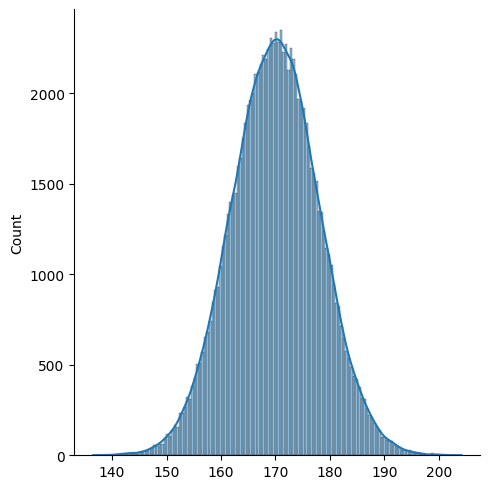

In [34]:
sns.displot(alturas, kde=True)
plt.show()
# Dm -> los valores que puede tomar la variable (x) -inf;inf


# Distribucion normal estándar: 

// [0,1] -> llevar mi distribución al centro (0) y que el desvío estándar sea 1

In [59]:
#grupo 1
mu1 = 170
sigma1 = 3
#grupo 2
mu2 = 180
sigma2 = 8
alturas1 = np.random.normal(mu1,sigma1,100000)
alturas2 = np.random.normal(mu2,sigma2,100000)

def standElements(arr,mu,sigma):
    arrSTD = []
    for i in range(len(arr)):
        # z = (x - mu) / sigma -> elemento estandarizado
        std = (arr[i] - mu) / sigma
        arrSTD.push(std)
    return arrSTD

In [61]:
max1 = alturas1.max()
max2 = alturas2.max()
min1 = alturas1.min()
min2 = alturas2.min()
print("max1 : ", max1, "max2 : ", max2)
print("min1 : ", min1, "min2 : ", min2)

df = pd.DataFrame({
    'alturas1': alturas1,
    'alturas2': alturas2
})

max1 :  182.50528437773463 max2 :  214.3116681629612
min1 :  157.42569277556092 min2 :  143.0787126902365


/var/folders/dm/31qyb_7s0nqdwc9x5b64b6kdphc6zs/T/ipykernel_71819/392928662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['alturas1'],color='b')
/var/folders/dm/31qyb_7s0nqdwc9x5b64b6kdphc6zs/T/ipykernel_71819/392928662.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['alturas2

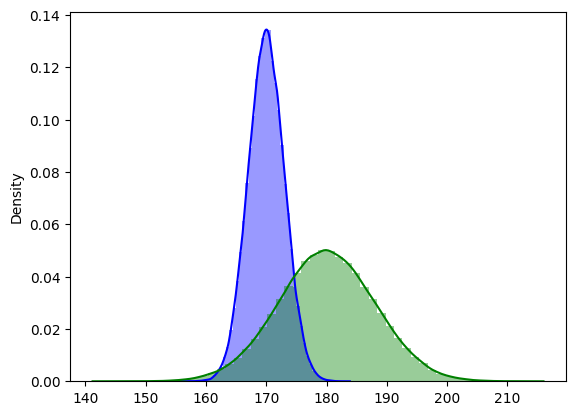

In [60]:
sns.distplot(x=df['alturas1'],color='b')
sns.distplot(x=df['alturas2'],color='g')
plt.show()

## Formula de estandarizacion (puntuación z)

**z(x) = (x - u) / o**

z156 (grupo 1)= (156 - 170) / 3 = -4.6666

z190(grupo 2) = (190- 180) / 8 = 1.25

## Calculo de probabilidades

a. ¿ Cual es la probabilidad que agarrando una persona cualquiera tenga una altura menor a 170?

b. Cual es la probabilidad de que tenga una altura menor a 160?


P(X<170) = 0.5

**z(x) = (x - u) / o**

Z170 = (170-170) / 3 = 0
z160 = (160-170) / 3 = -3.3333333

In [48]:
import scipy.stats as st

In [52]:
st.norm.cdf(-3.333333)

0.0004290608472901215

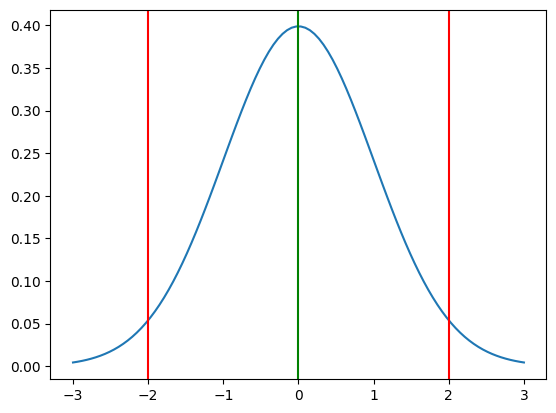

In [63]:
mu = 0
std = 1
x = np.linspace(mu-3*std, mu + 3*std,100)
sns.lineplot(x=x,y=st.norm.pdf(x,mu,std))
plt.axvline(x=-2,color='r')
plt.axvline(x=0,color='g')

plt.axvline(x=2,color='r')

## Distribucion normal aplicada al peso de estudiantes
> SUPERPROF

La media de los pesos de 500 estudiantes de un colegio es 70 ; kg y la desviación típica 3 ; kg.

Suponiendo que los pesos se distribuyen normalmente, hallar cuántos estudiantes pesan:

a. Menos de 64

b. Menos de 90 

c. 64kg -> 0

d.Mas de 64



In [74]:
# X: El peso de un estudiante
z64 = (64-70)/3
pmenos64 = st.norm.cdf(z64)
pmenos64

0.022750131948179195

In [72]:
z90 = (90-70)/3
pz90 = st.norm.cdf(z90)
pzmas90 = 1-pz90
pzmas90

1.308397834520747e-11

In [76]:
pmas64 = 1-pmenos64
pmas64

0.9772498680518208

## Intervalos de confianza

Antes de hablar de esto debemos entender la diferencia entre parametro poblacional y parametro muestral

![Muestra poblacional](estadistico-2.png)
![Muestra poblacional](estadisticos-1.png)

Ejemplo:

De una población de media de 170cm y desviación de 3 puedo decir lo siguiente:

**Seguridad 50% las alturas de las personas están entre 167 y 170**

**Seguridad 60% las alturas de la spersonas están entre 165 y 172** 

**Seguridad 99% las alturas de la spersonas están entre 155 y 185** 

**Seguridad 100% las alturas de la spersonas están entre 0 y 5** 

### Valores cotidianos 90%, 95%. 99%

Mu -> media poblacional
X -> media muestral

Intervalo de confianza = X +- Error

![Intervalos confianza](files/intervalo-confianza-grafico.jpeg)

In [87]:
# intervalo de confianza 90%
z09 = st.norm.ppf(1-(1-0.9)/2)

z95 = st.norm.ppf(1-(1-0.95)/2)
z99 = st.norm.ppf(1-(1-0.99)/2)

El tiempo diario que los adultos de una determinada ciudad dedican a actividades deportisa, expresado en minutos, se puede aproximar por una variable aleatoria con distribución normal de desviación típica de 20 minutos

a) Para una muestra de 250 habitantes se obtvo un tiempo medio de dedicacion a actividades deportivas de 90 minutos diarios. Calcule un intervalo de confianza de 90% para la media.



In [91]:
z90 = st.norm.ppf(1-(1-0.9)/2)
# error = z * desvio estándar / sqrt(N)
error = (z90 * 20) / math.sqrt(250)
error
intervaloConfianza90 = [90-error,90+error]
intervaloConfianza90

[87.91940644849777, 92.08059355150223]